# Reporting

The research question for our example-study is: “Does political party
affiliation influence the positioning stance of social media posts?”
This question aims to investigate whether there is a significant
relationship between the political party (either “Blue Party” or “Green
Party”) associated with social media accounts and the likelihood of
those accounts posting content with a positioning stance classified as
True or False. By examining this relationship, we seek to understand if
and how political biases or affiliations might affect the messaging and
communication strategies employed on visual social media platforms.

Let’s create some random data data, similar to Story or TikTok
dataframes. In this example we have one row per post. Each post has been
created by a random useraccount. We want to check for statistically
significant differences in *Positioning* between the Blue and the Green
party. Let’s imagine *Positioning* to be a variable classified by GPT-4.
It inidicates whether a given post contains any referrences to policy
issues.

For a real-world analysis we would have added the *Party* variable
manually. We would could i.e. create a dictionary and map usernames to
parties using the dictionary and pandas:

``` python
party_mapping = {
  'Blue Party': ['blue_mirjanahentschel', 'blue_eric85', 'blue_hofmanndominik', ...],
  'Green Party': ['green_buchholzuwe', 'green_wlange', 'green_istvan48', ...]
}
df['Party'] = df['Username'].map({user: party for party, users in party_mapping.items() for user in users})
```

In [26]:
# Reinitialize Faker and all required components for dataset generation
from faker import Faker
import numpy as np
import pandas as pd

fake = Faker(['de_DE'])  # German locale for more authentic usernames

num_rows = 500
ids = np.arange(1, num_rows + 1)
usernames_blue_party = [f"blue_{fake.user_name()}" for _ in range(num_rows // 2)]
usernames_green_party = [f"green_{fake.user_name()}" for _ in range(num_rows // 2)]
usernames = np.array(usernames_blue_party + usernames_green_party)
np.random.shuffle(usernames)  # Shuffle to mix parties

# Manually generated Lorem Ipsum text snippets
lorem_ipsum_texts = [
    "Lorem ipsum dolor sit amet, consectetur adipiscing elit.",
    "Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.",
    "Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.",
    "Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur.",
    "Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
] * (num_rows // 5)  # Repeat the list to cover all rows

# Assign parties
parties = np.array(["Blue Party" if "blue_" in username else "Green Party" for username in usernames])

# Positioning: More Trues for Blue Party, balanced for Green Party
positioning = np.array([np.random.choice([True, False], p=[0.7, 0.3]) if party == "Blue Party" else np.random.choice([True, False], p=[0.3, 0.7]) for party in parties])

# Create DataFrame
df = pd.DataFrame({
    "ID": ids,
    "Username": usernames,
    "Text": lorem_ipsum_texts,
    "Party": parties,
    "Positioning": positioning
})

Let’s take a look at our random data.

In [13]:
df.head()

With our randomly generated dataset at hand, let’s formulate a
hypothesis: if political party affiliation (either “Blue Party” or
“Green Party”) influences the positioning of social media posts
(categorized as either True or False), then we should observe a
statistically significant difference in the frequency of True
positioning statements between the two parties.

**H1** There is a significant association between a post’s political
party affiliation—categorized into two fictional parties, the “Blue
Party” and the “Green Party”—and its positioning, which is dichotomized
into true or false stances.

**H0** There is no statistically significant association between party
affiliation and the positioning of social media posts, implying that any
observed differences in the distribution of positioning stances across
the two parties could be attributed to chance.

For our analysis, we have chosen the chi-square (χ²) test, a statistical
method, to examine the relationship between the “Party” and
“Positioning” variables in our dataset. This decision is based on the
nature of our data: both variables are categorical, with “Party”
dividing posts into two distinct groups and “Positioning” being a binary
outcome. The chi-square test is suited for this scenario because it
allows us to determine if there is a statistically significant
association between the political party affiliation and the positioning
stance within our social media posts. By comparing the observed
frequencies of “True” and “False” positioning within each party to the
frequencies we would expect by chance, the chi-square test provides a
clear, quantitative measure of whether our variables are independent or,
conversely, if there is a pattern to the positioning that correlates
with party affiliation.

> **Tip**
>
> I recommend the [“Methodenberatung” by Universität Zürich
> (UZH)](https://www.methodenberatung.uzh.ch/de/datenanalyse_spss.html),
> which is an interactive decision tree that helps to pick the correct
> statistical test for different kinds of questions.

In [19]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Party'], df['Positioning'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"chi^2 statistics: {chi2} \n p-value: {p_value}")

chi^2 statistics: 21.193910256410255 
 p-value: 4.15081289863548e-06

The chi-square test of independence results in a chi-square statistic of
approximately 21.19 and a very low p-value, which is significantly less
than the common threshold of 0.05. This indicates that there is a
statistically significant difference in the distribution of
“Positioning” between the “Blue Party” and the “Green Party”.

Let’s check the contingency table for a descriptive analysis of the
distribution:

In [20]:
contingency_table

To understand the strength of the association observed in the chi-square
test of independence between the “Party” and “Positioning” variables, we
can calculate the effect size. One commonly used measure of effect size
for chi-square tests in categorical data is Cramer’s V. Cramer’s V
ranges from 0 (no association) to 1 (perfect association), providing
insight into the strength of the relationship between the two variables
beyond merely its statistical significance.

Cramer’s V is calculated as follows:

$V = \sqrt{\frac{\chi^2}{n(k-1)}}$

where: - $\chi^2$ is the chi-square statistic, - $n$ is the total sample
size, - $k$ is the smaller number of categories between the two
variables (in this case, since both variables are binary, (k = 2)).

Let’s calculate Cramer’s V for our dataset to assess the effect size of
the association between “Party” and “Positioning”.

In [18]:
# Calculate Cramer's V
n = df.shape[0]  # Total number of observations
k = min(contingency_table.shape)  # The smaller number of categories between the two variables
cramers_v = np.sqrt(chi2 / (n * (k - 1)))

print(f"Cramérs V: {cramers_v}")

Cramérs V: 0.4603684421896255

The calculated effect size, using Cramer’s V, for the association
between “Party” and “Positioning” in our dataset is approximately 0.460.
This indicates a moderate association between the political party
affiliation and the positioning stance of the posts. In practical terms,
this means that the difference in the distribution of “Positioning”
between the “Blue Party” and the “Green Party” is not only statistically
significant but also of a considerable magnitude, highlighting a strong
relationship between party affiliation and the likelihood of adopting a
particular positioning in our fictional social media dataset.

When reporting the results of our chi-square test of independence and
the effect size using APA guidelines, it’s important to provide a clear
and concise description of the statistical findings along with the
context of the analysis. Here’s how you might structure your report:

> “In the analysis examining the association between political party
> affiliation (Blue Party vs. Green Party) and the positioning of social
> media posts (True vs. False), a chi-square test of independence was
> conducted. The results indicated a statistically significant
> association between party affiliation and positioning, χ²(1, N=50) =
> 21.19, p \< .001. To assess the strength of this association, Cramer’s
> V was calculated, revealing an effect size of V = 0.460, which
> suggests a moderate association between the two variables. These
> findings suggest that political party affiliation is significantly
> related to the positioning stance taken in social media posts within
> this dataset.”

## Descriptive Analysis

In this section, we take a look at the descriptive analysis of our
synthetically generated dataset, focusing on political party
affiliations, the positioning of social media posts, and the mentioning
of specific policy issues over a defined time period. By categorizing
and counting the occurrences of discussions related to policy
domains—such as the economy, environment, healthcare, education, and
foreign policy—across different dates, we aim to uncover patterns that
may illuminate how political narratives and priorities are presented in
social media content. This type of analysis offers a snapshot of the
temporal dynamics within our fictional political landscape.

At first we need to add a date to each post.

In [ ]:
import datetime

# Generate a week's range of dates
start_date = datetime.date(2023, 1, 1)
date_range = [start_date + datetime.timedelta(days=x) for x in range(7)]

# Assign a random date to each row
df['Date'] = np.random.choice(date_range, size=num_rows)

Then we create a new dataframe counting posts per day by each party. We
are going to use this table to create a stacked barplot using python.
Afterwards we extend the fake dataset by adding policy issues to posts
and export the data for use with [RAWGraphs](https://www.rawgraphs.io/).

In [34]:
# Create a new DataFrame focusing on counts of policy issues by date
parties_counts = df.groupby(['Date', 'Party']).size().reset_index(name='Count')

Now we have a table with one row per data and party counting the daily
posts of each party.

In [35]:
parties_counts.head()

Using `matplotlib` we can create the stacked bargraph.

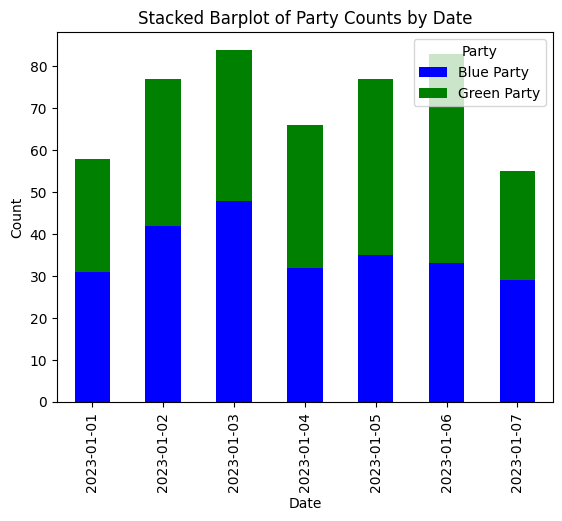

In [39]:
import matplotlib.pyplot as plt

# Pivot the DataFrame to get the data in the required format for a stacked barplot
pivot_df = parties_counts.pivot(index='Date', columns='Party', values='Count').fillna(0)

# Define custom colors for parties
party_colors = {
    'Blue Party': 'blue',
    'Green Party': 'green'
}

# Create a stacked barplot with custom colors
ax = pivot_df.plot(kind='bar', stacked=True, color=[party_colors[party] for party in pivot_df.columns])

# Set the X and Y axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Count')

# Set the title
ax.set_title('Stacked Barplot of Posts by Date Grouped by Party')

# Show the legend
plt.legend(title='Party', loc='upper right')

# Show the plot
plt.show()

Next, let’s add the fake policy issues to our synthetic data.

In [27]:
# Define five "Policy Issue" categories
policy_issues = ["Economy", "Environment", "Healthcare", "Education", "Foreign Policy"]

# Assign a "Policy Issue" to posts where Positioning is True
# Posts with Positioning as False will have "None" or a placeholder
df['Policy Issue'] = np.where(df['Positioning'], np.random.choice(policy_issues, size=num_rows), None)

In [28]:
df.head()

And once more, let’s create a new table that counts the daily occurences
of policy issues.

In [29]:
# Create a new DataFrame focusing on counts of policy issues by date
policy_issue_counts = df[df['Positioning']].groupby(['Date', 'Policy Issue']).size().reset_index(name='Count')

In [30]:
policy_issue_counts.head()

Finally we export the data as a `CSV` file for use with RAWGraphs.

In [32]:
policy_issue_counts.to_csv('2024-02-05-Fake-Issues-Per-Day.csv')